
# Caronas na UFSCar Sorocaba - Mulheres

<b>Os Objetivos de Desenvolvimento Sustentável no Brasil</b> são um apelo global à ação para acabar com a pobreza, proteger o meio ambiente e o clima e garantir que as pessoas, em todos os lugares, possam desfrutar de paz e de prosperidade. Baseado no objetivo 5, <b>alcançar a igualdade de gênero e empoderar todas as mulheres e meninas</b>, o grupo propôs a criação de um sistema de caronas focado exclusivamente em mulheres. A ideia central é que mulheres do <b>campus UFSCar Sorocaba</b> possam oferecer caronas que contenham a UFSCar como ponto no trajeto.


<img src="woman.jpg"  width=80%>

A ideia abrange os pontos posteriormente citados, haja vista que um sistema de caronas focado exclusivamente em mulheres ajuda a eliminar formas de violência e abuso e a tecnlogia é utiliza para favorecer o empoderamento feminino.

* (5.a) Realizar reformas para dar às mulheres direitos iguais aos recursos econômicos, bem como o acesso a propriedade e controle sobre a terra e outras formas de propriedade, serviços financeiros, herança e os recursos naturais, de acordo com as leis nacionais 

* (5.b) Aumentar o uso de tecnologias de base, em particular as tecnologias de informação e comunicação, para promover o empoderamento das mulheres


<h2>Obtenção dos Dados</h2>

Os dados foram obtidos a partir de uma pesquisa de mercado realizada com os alunos e docentes do campus.

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
import folium

%matplotlib inline
# tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("pesquisa_mercado.csv", sep = ',')

<h2>Análise dos Dados</h2>

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. Houveram perguntas gerais, e depois fora dado um direcionamento especifico a depender do meio de transporte utilizado pelos indivíduos.

**Perguntas realizadas**

* `1. Com qual gênero você se identifica?`
* `2. Qual o município de Sorocaba ou região que você reside atualmente?`
* `3. Com qual frequência você está na UFSCar Sorocaba?` 
* `4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?` 
- Ônibus
- Carro Próprio
- Carona
- Uber/Táxi
* `5. O quão você se sente segura:` 
- Em caronas?
- Em transporte público?
- Em Táxi/Uber?
- Com um motorista do gênero oposto?
- Com um motorista do mesmo gênero?

<b>Para usuários que utilizam como meio de transporte ônibus, carona ou uber/taxi, as perguntas foram:</b>

* `6. Em quais condições você estaria disposta a pegar caronas com mulheres da UFSCar? Se em nenhuma condição, por quê?`
* `7. Com que frequência você requisitaria carona?`
- 1-2 vezes por semana
- 3-5 vezes por semana
- Mensalmente
- Só em casos de emergência
- Não requisitaria
* `8. Ao requisitar uma carona o quão importante é`
- Escolher o motorista?
-  Saber previamente dados do motorista?
- A carona ser gratuita?
- Conversar previamente com o motorista?
- Ter o gênero do motorista verificado?

<b>Para usuários que utilizam como meio de transporte carro próprio, as perguntas foram:</b>

* `6. Em que condições você estaria disposta a oferecer caronas às mulheres que frequentam a UFSCar? Se em nenhuma condição, por quê?`
* `7. Com que frequência você ofereceria carona?`
- 1-2 vezes por semana
- 3-5 vezes por semana
- Mensalmente
- Ocasionalmente
- Não ofereceria
* `8. Ao oferecer uma carona o quão importante é:`
- Saber previamente o trajeto?
- Saber previamente dados do usuário?
- Dividir as despesas?
- Conversar previamente com o usuário?
- Ter o gênero do usuário verificado?


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e observar as categorias de cada coluna.

In [4]:
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])

Entradas:  38
Variáveis:  24


In [5]:
# verificar as 5 primeiras entradas do dataset
df.head()

,Carimbo de data/hora,1. Com qual gênero você se identifica?,2. Qual o município de Sorocaba ou região que você reside atualmente?,3. Com qual frequência você está na UFSCar Sorocaba?,4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?,5. O quão você se sente segura: [Em caronas?],5. O quão você se sente segura: [Em transporte público?],5. O quão você se sente segura: [Em Táxi/Uber?],5. O quão você se sente segura: [Com um motorista do gênero oposto?],5. O quão você se sente segura: [Com um motorista do mesmo gênero?],...,8. Ao requisitar uma carona o quão importante é [A carona ser gratuita?],8. Ao requisitar uma carona o quão importante é [Conversar previamente com o motorista?],8. Ao requisitar uma carona o quão importante é [Ter o gênero do motorista verificado?],"6. Em que condições você estaria disposta a oferecer caronas às mulheres que frequentam a UFSCar? Se em nenhuma condição, por quê?",7. Com que frequência você ofereceria carona?,8. Ao oferecer uma carona o quão importante é: [Saber previamente o trajeto?],8. Ao oferecer uma carona o quão importante é: [Saber previamente dados do usuário?],8. Ao oferecer uma carona o quão importante é: [Dividir as despesas?],8. Ao oferecer uma carona o quão importante é: [Conversar previamente com o usuário?],8. Ao oferecer uma carona o quão importante é: [Ter o gênero do usuário verificado?]
0,2022/07/10 12:03:29 PM GMT-3,Masculino,Sorocaba,1 - 2 vezes por semana,Carona,Muito segura,Razoavelmente segura,Muito segura,Muito segura,Muito segura,...,Pouco importante,Razoavelmente importante,Razoavelmente importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/07/10 12:04:15 PM GMT-3,Feminino,Votorantim,3 - 5 vezes por semana,Carona,Razoavelmente segura,Razoavelmente segura,Razoavelmente segura,Razoavelmente segura,Muito segura,...,Razoavelmente importante,Muito importante,Muito importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/07/10 12:05:00 PM GMT-3,Masculino,Sorocaba,3 - 5 vezes por semana,Ônibus,Razoavelmente segura,Muito segura,Razoavelmente segura,Muito segura,Razoavelmente segura,...,Razoavelmente importante,Nada importante,Muito importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022/07/10 12:05:10 PM GMT-3,Feminino,Sorocaba,3 - 5 vezes por semana,Ônibus,Pouco segura,Muito segura,Razoavelmente segura,Nada segura,Razoavelmente segura,...,Pouco importante,Muito importante,Muito importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/07/10 12:07:00 PM GMT-3,Masculino,Sorocaba,3 - 5 vezes por semana,Ônibus,Razoavelmente segura,Muito segura,Razoavelmente segura,Razoavelmente segura,Razoavelmente segura,...,Nada importante,Razoavelmente importante,Pouco importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De início, podemos observar que alguns indíviduos do gênero masculino responderam a pesquisa, logo precisamos realizar uma limpeza nos dados para analisar somente o público alvo. A seguir, veremos a quantidade de pessoas de cada gênero que responderam a pesquisa.

In [6]:
# verifica porcentagem de cada gênero
round(df['1. Com qual gênero você se identifica?'].value_counts()/df.shape[0],2) * 100

Feminino     55.0
Masculino    45.0
Name: 1. Com qual gênero você se identifica?, dtype: float64

Agora limparemos os dados para manter apenas pessoas que se identificam com o gênero feminino.

In [7]:
# realiza limpeza de dados
df_fem = df.loc[df['1. Com qual gênero você se identifica?'] == 'Feminino']

Por fim, observaremos novamente a porcentagem de cada gênero.

In [8]:
# verifica porcentagem de cada gênero
round(df_fem['1. Com qual gênero você se identifica?'].value_counts()/df_fem.shape[0],2) * 100

Feminino    100.0
Name: 1. Com qual gênero você se identifica?, dtype: float64

In [9]:
# ver quantidade de respostas totais pós limpeza
df_fem.shape[0]

21

### Q2. Em qual municipio há mais mulheres? 

Podemos observar que:
<ul>
    <li> De modo geral, mais de 70% das mulheres que responderam o questionário vivem em Sorocaba.</li>
    <li> 60% das mulheres que possuem veículo próprio vivem em Votorantim.</li>
    <li> Mais de 80% das mulheres que não possuem veículo próprio vivem em Sorocaba.</li>
</ul>

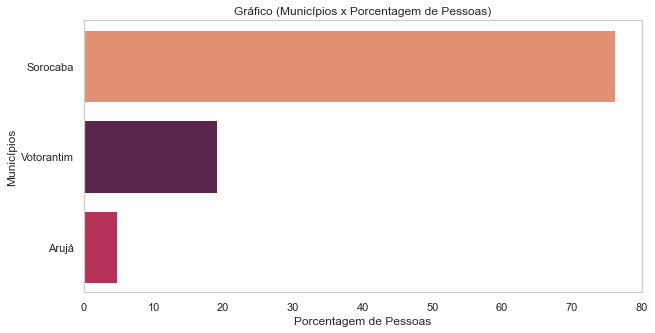

In [32]:
# Plotando gráficos para questão 2
fig, ax = plt.subplots()

# definir informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_fem.groupby("2. Qual o município de Sorocaba ou região que você reside atualmente?").size() 
pal = sns.color_palette("rocket", len(data))
rank = data.argsort().argsort() 
ax.grid(False)

# gráfico da quantidade de pessoas por município
ax2 = sns.barplot(x= df_fem['2. Qual o município de Sorocaba ou região que você reside atualmente?'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['2. Qual o município de Sorocaba ou região que você reside atualmente?'].value_counts().index, palette=np.array(pal[::-1])[rank], ax = ax)
ax2.set_xlabel('Porcentagem de Pessoas')
ax2.set_ylabel('Municípios')
ax2.set_title("Gráfico (Municípios x Porcentagem de Pessoas)");

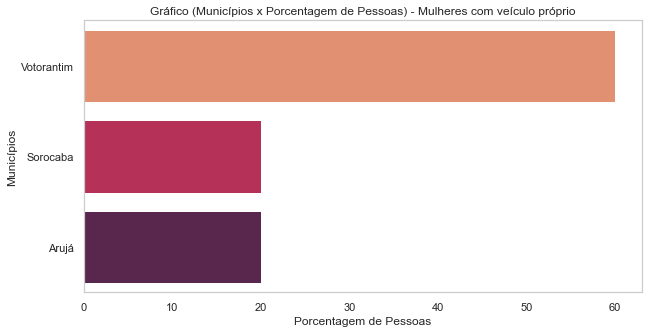

In [33]:
# Plotando gráficos para questão 2
fig, ax = plt.subplots()

df_copia = df_fem.copy()

# mulheres que possuem veículo próprio
df_copia = df_copia.loc[df_copia['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'] == 'Carro Próprio']

# definir informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_copia.groupby("2. Qual o município de Sorocaba ou região que você reside atualmente?").size() 
pal = sns.color_palette("rocket", len(data))
rank = data.argsort().argsort() 
ax.grid(False)

# gráfico da quantidade de pessoas por município
ax2 = sns.barplot(x= df_copia['2. Qual o município de Sorocaba ou região que você reside atualmente?'].value_counts().values/df_copia.shape[0] * 100, y= df_copia['2. Qual o município de Sorocaba ou região que você reside atualmente?'].value_counts().index, palette=np.array(pal[::-1])[rank], ax = ax)
ax2.set_xlabel('Porcentagem de Pessoas')
ax2.set_ylabel('Municípios')
ax2.set_title("Gráfico (Municípios x Porcentagem de Pessoas) - Mulheres com veículo próprio");

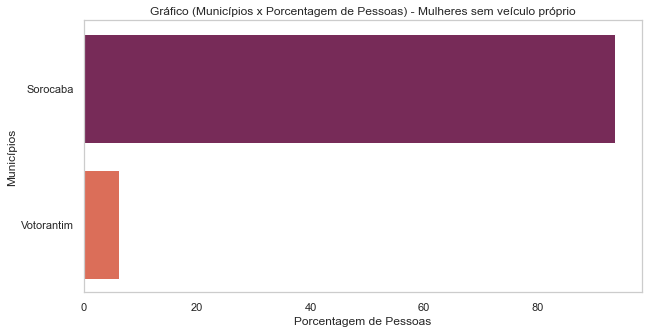

In [34]:
# Plotando gráficos para questão 2
fig, ax = plt.subplots()

df_copia = df_fem.copy()

# mulheres que não possum veículo próprio
df_copia = df_copia.loc[df_copia['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'] != 'Carro Próprio']

# definir informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_copia.groupby("2. Qual o município de Sorocaba ou região que você reside atualmente?").size() 
pal = sns.color_palette("rocket", len(data))
rank = data.argsort().argsort() 
ax.grid(False)

# gráfico da quantidade de pessoas por município
ax2 = sns.barplot(x= df_copia['2. Qual o município de Sorocaba ou região que você reside atualmente?'].value_counts().values/df_copia.shape[0] * 100, y= df_copia['2. Qual o município de Sorocaba ou região que você reside atualmente?'].value_counts().index, palette=np.array(pal[::-1])[rank], ax = ax)
ax2.set_xlabel('Porcentagem de Pessoas')
ax2.set_ylabel('Municípios')
ax2.set_title("Gráfico (Municípios x Porcentagem de Pessoas) - Mulheres sem veículo próprio");

### Q3. Com qual frequência, as mulheres estão na UFSCar Sorocaba?

Podemos perceber que de modo geral, mais de 95% das mulheres estão presentes na UFSCar de 3 a 5 vezes por semana.

In [26]:
df_fem['3. Com qual frequência você está na UFSCar Sorocaba?'].value_counts()/df_fem.shape[0] * 100

3 - 5 vezes por semana    95.238095
1 - 2 vezes por semana     4.761905
Name: 3. Com qual frequência você está na UFSCar Sorocaba?, dtype: float64

Quando restrigimos os dados para as mulheres que possuem carro próprio, 80% está presente de 3 a 5 vezes por semana

In [27]:
df_copia = df_fem.copy()
# mulheres que possuem veículo próprio
df_copia = df_copia.loc[df_copia['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'] == 'Carro Próprio']
df_copia['3. Com qual frequência você está na UFSCar Sorocaba?'].value_counts()/df_copia.shape[0] * 100

3 - 5 vezes por semana    80.0
1 - 2 vezes por semana    20.0
Name: 3. Com qual frequência você está na UFSCar Sorocaba?, dtype: float64

Já para as mulheres que não possuem veículo próprio, 100% está presente no campus de 3 a 5 vezes durante a semana

In [28]:
df_copia = df_fem.copy()
# mulheres que não possuem veículo próprio
df_copia = df_copia.loc[df_copia['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'] != 'Carro Próprio']
df_copia['3. Com qual frequência você está na UFSCar Sorocaba?'].value_counts()/df_copia.shape[0] * 100

3 - 5 vezes por semana    100.0
Name: 3. Com qual frequência você está na UFSCar Sorocaba?, dtype: float64

### Q4. Qual o meio de transporte mais utilizado para ir à UFSCar?

Pode-se notar que mais de 60% das mulheres utilizam ônibus como meio de transporte, enquanto mais de 20% possui carro próprio.

In [38]:
df_fem['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'].value_counts()/df_fem.shape[0] * 100

Ônibus           66.666667
Carro Próprio    23.809524
Carona            4.761905
Uber/Táxi         4.761905
Name: 4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?, dtype: float64

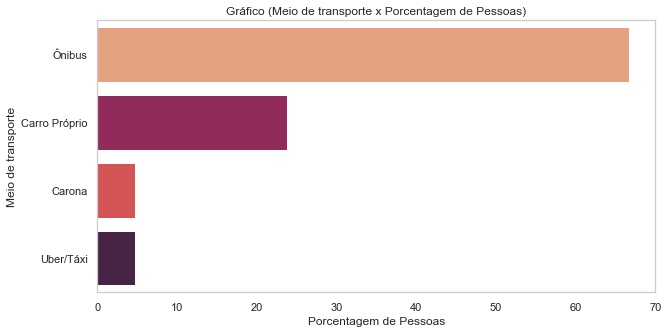

In [36]:
# Plotando gráficos para questão 2
fig, ax = plt.subplots()

# definir informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_fem.groupby("4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?").size() 
pal = sns.color_palette("rocket", len(data))
rank = data.argsort().argsort() 
ax.grid(False)

# gráfico da quantidade de pessoas por município
ax2 = sns.barplot(x= df_fem['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['4. Qual meio de transporte você utiliza majoritariamente para ir à UFSCar Sorocaba?'].value_counts().index, palette=np.array(pal[::-1])[rank], ax = ax)
ax2.set_xlabel('Porcentagem de Pessoas')
ax2.set_ylabel('Meio de transporte')
ax2.set_title("Gráfico (Meio de transporte x Porcentagem de Pessoas)");

### Q5. Quão seguras as mulheres se sentem em diversas situações?

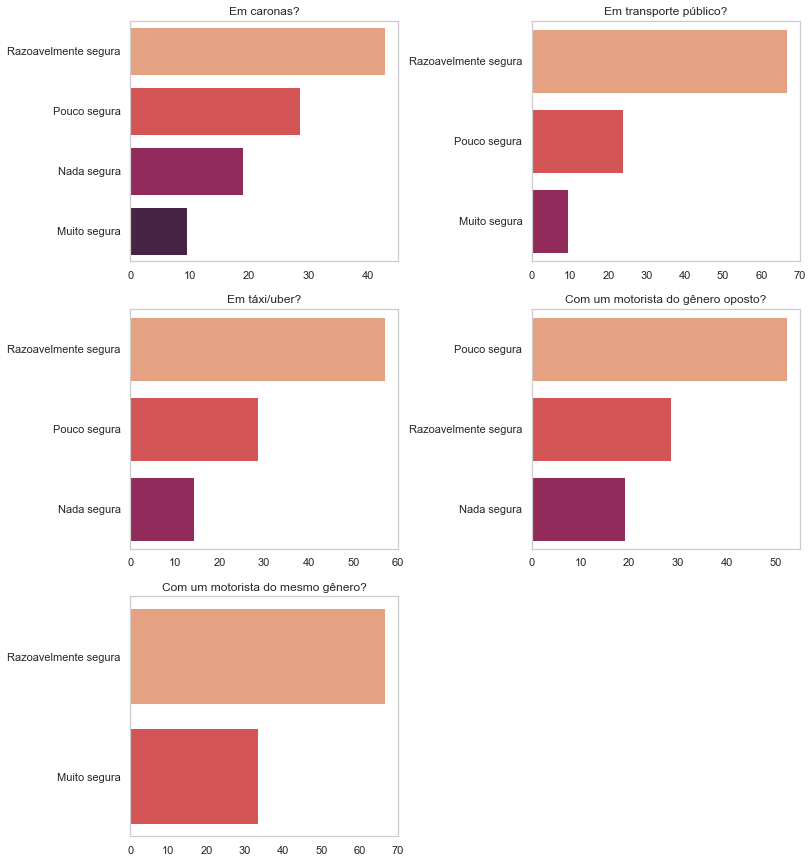

In [72]:
# plotar gráficos para as informações obtidas
 
fig, ax= plt.subplots(3, 2,figsize=(12, 15))
fig.delaxes(ax[2,1])
fig = plt.subplots_adjust(wspace= 0.5)

# define informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
data = df_fem.groupby("5. O quão você se sente segura: [Em caronas?]").size() 
pal = sns.color_palette("rocket", len(data))
rank = data.argsort().argsort() 
ax[0,0].grid(False)
ax[0,1].grid(False)
ax[1,0].grid(False)
ax[1,1].grid(False)
ax[2,0].grid(False)

# Caronas
ax2 = sns.barplot(x= df_fem['5. O quão você se sente segura: [Em caronas?]'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['5. O quão você se sente segura: [Em caronas?]'].value_counts().index, palette=np.array(pal[::-1])[rank], order = df_fem['5. O quão você se sente segura: [Em caronas?]'].value_counts().sort_values(ascending = False).index , ax = ax[0,0])
ax2.set_title("Em caronas?");

# Transporte Público
ax2 = sns.barplot(x= df_fem['5. O quão você se sente segura: [Em transporte público?]'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['5. O quão você se sente segura: [Em transporte público?]'].value_counts().sort_values(ascending = False).index , ax = ax[0,1], palette=np.array(pal[::-1])[rank])
ax2.set_title("Em transporte público?");

# Taxi/Uber
ax2 = sns.barplot(x= df_fem['5. O quão você se sente segura: [Em Táxi/Uber?]'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['5. O quão você se sente segura: [Em Táxi/Uber?]'].value_counts().sort_values(ascending = False).index , ax = ax[1,0], palette=np.array(pal[::-1])[rank])
ax2.set_title("Em táxi/uber?");
    
# Motorista do gênero oposto
ax2 = sns.barplot(x= df_fem['5. O quão você se sente segura: [Com um motorista do gênero oposto?]'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['5. O quão você se sente segura: [Com um motorista do gênero oposto?]'].value_counts().sort_values(ascending = False).index , ax = ax[1,1], palette=np.array(pal[::-1])[rank])
ax2.set_title("Com um motorista do gênero oposto?");

# Motorista do mesmo gênero
ax2 = sns.barplot(x= df_fem['5. O quão você se sente segura: [Com um motorista do mesmo gênero?]'].value_counts().values/df_fem.shape[0] * 100, y= df_fem['5. O quão você se sente segura: [Com um motorista do mesmo gênero?]'].value_counts().sort_values(ascending = False).index , ax = ax[2,0], palette=np.array(pal[::-1])[rank])
ax2.set_title("Com um motorista do mesmo gênero?");



## Conclusões

Com base na análise explicitada previamente, constatamos a presença de <b>dados ausentes e outliers</b>, o que nos indica que mesmo uma base relativamente pequena demanda o processo de analisar a qualidade de dados para <b>aprovar/rejeitar</b> as sugestões propostas pelo sistema, bem como necessidade de alteração para obter um dataset mais fidedigno à realidade.

Também observamos que os habitantes de Hong Kong indicam-nos um padrão interessante em relação às escolhas do AirBnb, pois mais de <b>50% dos usuários</b> analisados ofertam para alugar <b>quartos privados</b>, enquanto <b>somente 1% oferta hotéis</b>.  O número mínimo de noites alugadas observado foi um, enquanto sua média varia em aproximadamente 15 dias. Ademais, o menor preço observado foi 61 HKD no North District, cujo é o segundo menor em relação à densidade populacional. Já o maior preço observado foi 1442 HKD no distrito de Yau Tsim Mong, que de maneira inversamente proporcional, possui a segunda maior densidade populacional da região.

Por fim, lembramos que a base utilizada nessa análise é uma <b>versão resumida</b>, ideal para o que foi proposto nesse projeto de uma abordagem inicial. Para um estudo mais aprofundado é recomendado que seja utilizado a versão completa, contendo 106 atributos.